In [3]:
import numpy as np 
import pandas as pd 
import tensorflow as tf 
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,GlobalAveragePooling1D,Dropout,Embedding
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [5]:
df = pd.read_csv(r'C:\Users\Mahajan\Desktop\Final Year Codes\DL\IMDB Dataset.csv',encoding="latin1")

In [7]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [9]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [11]:
texts = df['review'].values
labels = LabelEncoder().fit_transform(df['sentiment'].values)

In [21]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences,maxlen=200)

In [23]:
x_train,x_test,y_train,y_test=train_test_split(padded,labels,test_size=0.2,random_state=42)

In [25]:
model = Sequential ([
    Embedding(input_dim = 10000,output_dim = 16,input_length = 200),
    GlobalAveragePooling1D(),
    Dense(16,activation = 'relu'),
    Dropout(0.5),
    Dense(1,activation = 'sigmoid'),
    
])

D:\AS\anaconda-jupyternotebook\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [27]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam',metrics =['Accuracy'])

In [34]:
early_stop = EarlyStopping(monitor = 'val_loss',patience = 2, restore_best_weights = True) 

In [36]:
history=model.fit(x_train,y_train,validation_data = (x_test,y_test),callbacks = [early_stop],epochs = 100, batch_size=32)

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - Accuracy: 0.6572 - loss: 0.6161 - val_Accuracy: 0.8769 - val_loss: 0.3146
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - Accuracy: 0.8713 - loss: 0.3272 - val_Accuracy: 0.8803 - val_loss: 0.2853
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - Accuracy: 0.9002 - loss: 0.2745 - val_Accuracy: 0.8924 - val_loss: 0.2605
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - Accuracy: 0.9168 - loss: 0.2414 - val_Accuracy: 0.8922 - val_loss: 0.2595
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - Accuracy: 0.9213 - loss: 0.2319 - val_Accuracy: 0.8900 - val_loss: 0.2681
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - Accuracy: 0.9348 - loss: 0.2038 - val_Accuracy: 0.8815 - val_loss: 0.2896


In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (32, 200, 16)          │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (32, 16)               │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 16)               │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (32, 16)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 1)                │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 480,869 (1.83 MB)

 Trainable params: 160,289 (626.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 320,580 (1.22 MB)

In [40]:
loss,accuracy = model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Accuracy: 0.8906 - loss: 0.2623


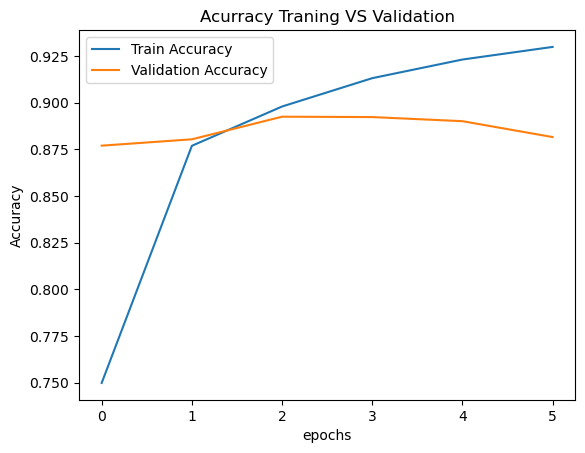

In [42]:
plt.plot(history.history['Accuracy'],label = 'Train Accuracy')
plt.plot(history.history['val_Accuracy'],label='Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Acurracy Traning VS Validation')
plt.legend()
plt.show()

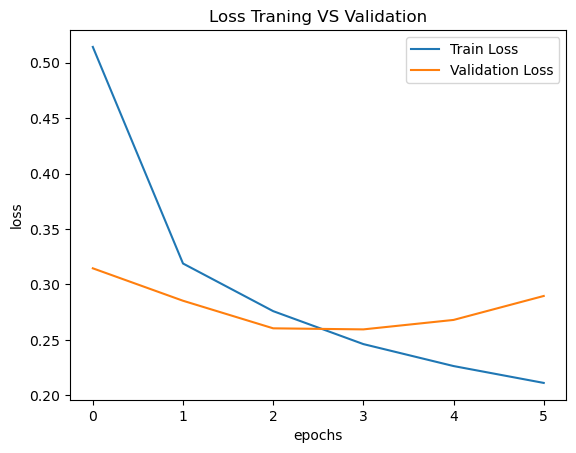

In [45]:
plt.plot(history.history['loss'],label = 'Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss Traning VS Validation')
plt.legend()
plt.show()

In [47]:
# Test on new sample review
def predict_review(text):
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=200, padding='post', truncating='post')
    pred = model.predict(padded)[0][0]
    sentiment = "Positive" if pred > 0.5 else "Negative"
    print(f"Review: {text}")
    print(f"Predicted Sentiment: {sentiment} ({pred:.2f})")



In [49]:
# Example usage
predict_review("The movie was fantastic! I loved it.")
predict_review("This movie was terrible. Waste of time.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
Review: The movie was fantastic! I loved it.
Predicted Sentiment: Positive (0.92)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Review: This movie was terrible. Waste of time.
Predicted Sentiment: Negative (0.05)


In [61]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error

# Evaluate model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Predict on test set
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype("int32").flatten()


# Metrics Calculation
print("\nClassification Report:")

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Accuracy: 0.8905 - loss: 0.2623
Test Loss: 0.2595
Test Accuracy: 0.8922
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report:
Precision: 0.8818
Recall: 0.9077
F1 Score: 0.8946
Mean Squared Error (MSE): 0.1078
Mean Absolute Error (MAE): 0.1078
